In [147]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk import word_tokenize
tt = TweetTokenizer()
from string import punctuation
import numpy as np
import math
matplotlib.rcParams.update({'figure.autolayout': True})

In [202]:
from rpy2.robjects.packages import importr

In [96]:
b = 's.'

In [97]:
df = pd.read_csv('tablita.csv')
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('(?:\\s|^)'+b+'(?:\\s|$)','sindrome')
df['historia_clinica'] = df['historia_clinica'].str.replace(',','')

In [129]:
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('años','anos')
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('mama','seno')

In [130]:
stops_manunales = ['paciente','Gen','gen','secuenciacion','molecular','tipo']
pat = r'\b(?:{})\b'.format('|'.join(stops_manunales))

In [131]:
df1 = df['historia_clinica'].str.replace(pat,'')
df1.to_csv('hc.csv')

In [132]:
top_N = 30

In [133]:
df2 = pd.read_csv('hc.csv', names = ["DOC","HC"])
df2

,DOC,HC
0,0,con cuadro clinico compatible con crisis febr...
1,1,sospecha craneosinostosis por abombamiento fro...
2,2,tumor maligno de retina pacientes sin riesgo c...
3,3,con crisis compulsivas con crisis donde hubo ...
4,4,prueba para el complejo de esclerosis tuberosa...
5,5,sindrome de hipermovilidad miopia degenerativa...
6,6,fibrosis quistica
7,7,distrofia muscular progresiva en estudio duche...
8,8,fibrosis qusitica
9,9,con evidencia de retinoblatoma bilateral con ...


In [134]:
list(df2)

['DOC', 'HC']

In [135]:
txt = df2.HC.str.lower().str.replace(r'.', ' ').str.cat(sep= ' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

Frecuencias, sin STOPWORDS:
                 Frecuencias
Palabras                    
cancer                    13
seno                      10
sospecha                   9
fibrosis                   9
quistica                   8
estudio                    7
tumor                      7
distrofia                  7
normal                     7
anos                       7
tiroides                   7
diagnostico                7
sindrome                   7
muscular                   6
negativo                   5
epilepsia                  5
miembros                   5
evidencia                  5
especificada               5
desarrollo                 5
enfermedad                 5
bilateral                  5
baja                       4
medio                      4
antecedentes               4
infiltrante                4
distal                     4
historia                   4
izquierdo                  4
manifestaciones            4


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


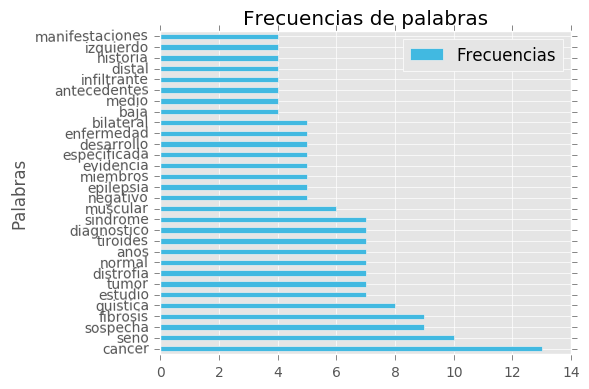

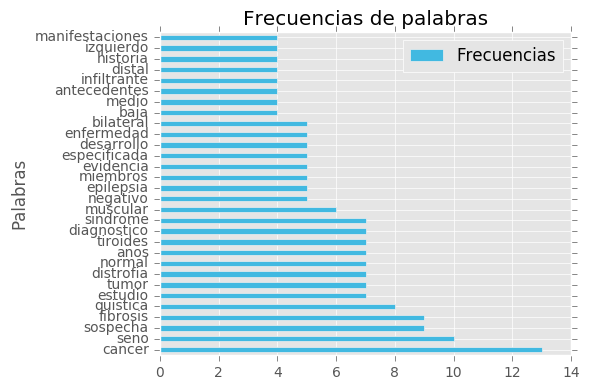

In [136]:
stopwords = nltk.corpus.stopwords.words('spanish')+ list(punctuation)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Palabras', 'Frecuencias']).set_index('Palabras')
print('Frecuencias, sin STOPWORDS:')
print('=' * 60)

print(rslt)
print('=' * 60)
matplotlib.style.use('ggplot')

rslt.plot.barh(rot=1, color = [('#41b9e1')],title = 'Frecuencias de palabras');
plot = rslt.plot(kind="barh", title = 'Frecuencias de palabras' , color = [('#41b9e1')])
#ax.set_yticks(ind+width/2)
#ax.set_yticklabels(x, minor=False)
fig = plot.get_figure()
fig.savefig("frecuecias2.png", bbox_inches=0)


In [141]:
frecuencias = rslt.sort_values(by='Frecuencias',ascending=[True])
frecuencias

,Frecuencias
Palabras,
manifestaciones,4
historia,4
distal,4
infiltrante,4
antecedentes,4
medio,4
baja,4
izquierdo,4
bilateral,5


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


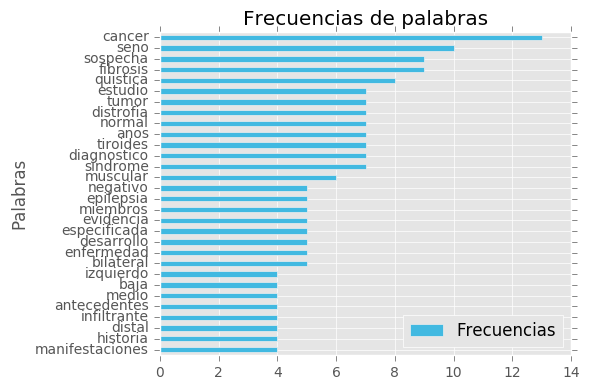

In [139]:
plot = frecuencias.plot(kind="barh", title = 'Frecuencias de palabras' , color = [('#41b9e1')])
fig = plot.get_figure()
fig.savefig("frecuecias.png", bbox_inches=0)

In [199]:
rslt2 = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Palabras', 'Frecuencias'])

In [221]:
rslt2['Invertidas'] = np.log10(len(rslt2['Frecuencias'])/rslt2['Frecuencias'])

In [222]:
rslt2

,Palabras,Frecuencias,invertidas,Invertidas
0,cancer,13,0.363178,0.363178
1,seno,10,0.477121,0.477121
2,sospecha,9,0.522879,0.522879
3,fibrosis,9,0.522879,0.522879
4,quistica,8,0.574031,0.574031
5,estudio,7,0.632023,0.632023
6,tumor,7,0.632023,0.632023
7,distrofia,7,0.632023,0.632023
8,normal,7,0.632023,0.632023
9,anos,7,0.632023,0.632023


In [226]:
d = rslt2[['Palabras','Invertidas']]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


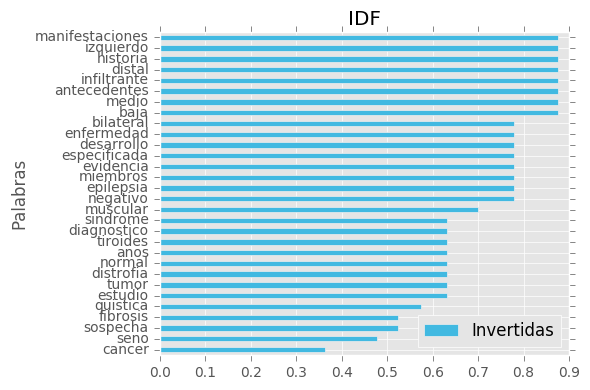

In [227]:
plot = rslt2[['Palabras','Invertidas']].plot(x='Palabras',kind="barh", title = 'IDF' , color = [('#41b9e1')])
fig = plot.get_figure()
fig.savefig("idffrecuecias.png", bbox_inches=0)

In [230]:
rslt2['tf_idf'] = rslt2['Frecuencias'] * rslt2['Invertidas']

In [246]:
rslt2['tf_idf']/math.sqrt(rslt2['tf_idf'].sum()**2)   #apply(np.sqrt) 

0     0.038632
1     0.039041
2     0.038506
3     0.038506
4     0.037576
5     0.036201
6     0.036201
7     0.036201
8     0.036201
9     0.036201
10    0.036201
11    0.036201
12    0.036201
13    0.034316
14    0.031836
15    0.031836
16    0.031836
17    0.031836
18    0.031836
19    0.031836
20    0.031836
21    0.031836
22    0.028641
23    0.028641
24    0.028641
25    0.028641
26    0.028641
27    0.028641
28    0.028641
29    0.028641
Name: tf_idf, dtype: float64

In [247]:
math.sqrt(rslt2['tf_idf'].sum()**2) 

122.21172332883017

In [248]:
3.06**2 + 2.76**2 + 2.30**2 + 2.00**2 + 1.85**2 + 2.04**2 + 1.30**2 + 0+ 1.78**2 + 0 + 0 + 2.58**2 

45.370099999999994

In [249]:
math.sqrt(45.370099999999994)

6.735733070720662

In [252]:
1.78/6.735733070720662

0.26426225346390636